<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


 Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans. 


## Objectives


Perform exploratory  Data Analysis and determine Training Labels 

- create a column for the class
- Standardize the data
- Split into training data and test data
-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression
- Find the method performs best using test data 


----


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab 



In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Load the dataframe  


Load the data 


In [4]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

data.head()

data.to_csv("data_part_2.csv")

In [5]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_3.csv')

X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then 
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df['name of  column']).


In [6]:
data.to_csv("data_part_2.csv")

X.to_csv("data_part_3.csv")

print(data.dtypes)

print("**** part3 below")

print(X.dtypes)


FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
Class               int64
dtype: object
**** part3 below
FlightNumber     float64
PayloadMass      float64
Flights          float64
Block            float64
ReusedCount      float64
                  ...   
GridFins_True    float64
Reused_False     float64
Reused_True      float64
Legs_False       float64
Legs_True        float64
Length: 83, dtype: object


In [7]:
target = data['Class']
print(type(target))
print(target[0:5])
#print(target)

<class 'pandas.core.series.Series'>
0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


In [8]:
print (target.value_counts())
print(data.columns)
print(data.dtypes)
print(data.describe())

1    60
0    30
Name: Class, dtype: int64
Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')
FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
Class               int64
dtype: object
       FlightNumber   PayloadMass    Flights      Block  ReusedCount  \
count     90.000000     90.000000  90.000000  90.000000    90.000000   
mean      45.500000   6104.959412   1.788889   3.500000     1.65555

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [11]:
# check var values, keep only required vars and transform categorical to binary vars with dummy vars

print (data['Outcome'].value_counts())
print (data['LandingPad'].value_counts())
print(data['Class'].value_counts())

dd = data['LandingPad'].value_counts()
print(len(dd))

print (data['Latitude'].value_counts())
print (data['Longitude'].value_counts())

print(data['BoosterVersion'].value_counts())

dd = data['Block'].value_counts()
print(dd)

dd = data['Serial'].value_counts()
print(len(dd))


dd = data['FlightNumber'].value_counts()
print(len(dd))

dd = data['Flights'].value_counts()
print(len(dd))
#print(data_process.dtypes)

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64
5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb554034e7c9     2
5e9e3032383ecb761634e7cb     2
Name: LandingPad, dtype: int64
1    60
0    30
Name: Class, dtype: int64
5
28.561857    55
28.608058    22
34.632093    13
Name: Latitude, dtype: int64
-80.577366     55
-80.603956     22
-120.610829    13
Name: Longitude, dtype: int64
Falcon 9    90
Name: BoosterVersion, dtype: int64
5.0    39
1.0    19
3.0    15
4.0    11
2.0     6
Name: Block, dtype: int64
53
90
6


In [12]:
# dont include serial with 53 values for dummies,# Change categorical variable to 

data_process = pd.get_dummies(data=data, columns=['Block','Orbit','LaunchSite','LandingPad'])
data_process.head()

print(data_process.dtypes)
#print(data_process.describe())

# drop vars not useful date, target and target leak, and serial with too many values
data_process.drop(['Date','Outcome','Class','Longitude','Latitude','Serial','BoosterVersion','FlightNumber'],axis=1,inplace=True)
print("New data *******")

print(data_process.dtypes)

#df_sydney_processed = df_sydney_processed.astype(float)


FlightNumber                             int64
Date                                    object
BoosterVersion                          object
PayloadMass                            float64
Outcome                                 object
Flights                                  int64
GridFins                                  bool
Reused                                    bool
Legs                                      bool
ReusedCount                              int64
Serial                                  object
Longitude                              float64
Latitude                               float64
Class                                    int64
Block_1.0                                uint8
Block_2.0                                uint8
Block_3.0                                uint8
Block_4.0                                uint8
Block_5.0                                uint8
Orbit_ES-L1                              uint8
Orbit_GEO                                uint8
Orbit_GTO    

In [13]:
# replace boolean with 0 and 1 

print (data_process['GridFins'].value_counts())
print (data_process['Reused'].value_counts())
print (data_process['Legs'].value_counts())


#df["somecolumn"] = df["somecolumn"].astype(int) # if miss val will fail
#data_process['GridFins'] = data_process['GridFins'].replace({True: 1, False: 0})  # miss vals nor issue
data_process = data_process.replace({True: 1, False: 0})  # miss vals nor issue

#print (data_process['GridFins'].value_counts())
#print (data_process['Reused'].value_counts())
#print (data_process['Legs'].value_counts())
print(data_process.head())




True     70
False    20
Name: GridFins, dtype: int64
False    53
True     37
Name: Reused, dtype: int64
True     71
False    19
Name: Legs, dtype: int64
   PayloadMass  Flights  GridFins  Reused  Legs  ReusedCount  Block_1.0  \
0  6104.959412        1         0       0     0            0          1   
1   525.000000        1         0       0     0            0          1   
2   677.000000        1         0       0     0            0          1   
3   500.000000        1         0       0     0            0          1   
4  3170.000000        1         0       0     0            0          1   

   Block_2.0  Block_3.0  Block_4.0  ...  Orbit_SSO  Orbit_VLEO  \
0          0          0          0  ...          0           0   
1          0          0          0  ...          0           0   
2          0          0          0  ...          0           0   
3          0          0          0  ...          0           0   
4          0          0          0  ...          0           0   


In [14]:
#print(data_process.dtypes)
#Miss val check
print ("Miss value check") # conver will have issue if miss
print(data_process.isnull().sum())


Miss value check
PayloadMass                            0
Flights                                0
GridFins                               0
Reused                                 0
Legs                                   0
ReusedCount                            0
Block_1.0                              0
Block_2.0                              0
Block_3.0                              0
Block_4.0                              0
Block_5.0                              0
Orbit_ES-L1                            0
Orbit_GEO                              0
Orbit_GTO                              0
Orbit_HEO                              0
Orbit_ISS                              0
Orbit_LEO                              0
Orbit_MEO                              0
Orbit_PO                               0
Orbit_SO                               0
Orbit_SSO                              0
Orbit_VLEO                             0
LaunchSite_CCAFS SLC 40                0
LaunchSite_KSC LC 39A                  0

In [15]:
data_process = data_process.astype(float) # drop object type or convert Booster
print(data_process.dtypes)

PayloadMass                            float64
Flights                                float64
GridFins                               float64
Reused                                 float64
Legs                                   float64
ReusedCount                            float64
Block_1.0                              float64
Block_2.0                              float64
Block_3.0                              float64
Block_4.0                              float64
Block_5.0                              float64
Orbit_ES-L1                            float64
Orbit_GEO                              float64
Orbit_GTO                              float64
Orbit_HEO                              float64
Orbit_ISS                              float64
Orbit_LEO                              float64
Orbit_MEO                              float64
Orbit_PO                               float64
Orbit_SO                               float64
Orbit_SSO                              float64
Orbit_VLEO   

In [16]:
Xvars = data_process
Yvar = target

x_train, x_test, y_train, y_test = train_test_split(Xvars,Yvar, test_size=0.2, random_state=10)

transform = preprocessing.StandardScaler()

print(x_train.shape)

print(y_train.shape)

print(x_train.head())

print(y_train.head())

(72, 30)
(72,)
    PayloadMass  Flights  GridFins  Reused  Legs  ReusedCount  Block_1.0  \
39      5200.00      2.0       1.0     1.0   1.0          1.0        0.0   
50      5383.85      2.0       0.0     1.0   0.0          1.0        0.0   
6       2296.00      1.0       0.0     0.0   1.0          0.0        1.0   
71     15400.00      4.0       1.0     1.0   1.0          5.0        0.0   
56      2800.00      2.0       1.0     1.0   1.0          4.0        0.0   

    Block_2.0  Block_3.0  Block_4.0  ...  Orbit_SSO  Orbit_VLEO  \
39        0.0        1.0        0.0  ...        0.0         0.0   
50        0.0        0.0        1.0  ...        0.0         0.0   
6         0.0        0.0        0.0  ...        0.0         0.0   
71        0.0        0.0        0.0  ...        0.0         1.0   
56        0.0        0.0        0.0  ...        1.0         0.0   

    LaunchSite_CCAFS SLC 40  LaunchSite_KSC LC 39A  LaunchSite_VAFB SLC 4E  \
39                      0.0                    

In [17]:
from sklearn.preprocessing import StandardScaler
xtrain_vals = x_train.values[:,:]
ytrain_vals = y_train.values[:]
xtest_vals = x_test.values[:,:]
ytest_vals = y_test.values[:]


print(np.size(xtrain_vals,0))
print(np.size(xtrain_vals,1))
print(np.size(xtrain_vals,0))
print(np.shape(xtrain_vals))


72
30
72
(72, 30)


In [18]:
#x_trainscal = StandardScaler().fit_transform(xtrain_vals)
#print(x_trainscal[0:5,0:5])

# fit scaler on training data z scale
norm = StandardScaler().fit(xtrain_vals)  # MinMaxScaler()

# transform training data
xtrain_norm = norm.transform(xtrain_vals)

# transform testing data
xtest_norm = norm.transform(xtest_vals)


print(xtrain_norm[0:5,0:5])

#print(norm.scale_) #stdev
#print(norm.mean_) Mu
#print(norm.var_)
print(type(norm))


[[-0.23147116  0.12513743  0.55595945  1.11803399  0.53452248]
 [-0.19249176  0.12513743 -1.79869234  1.11803399 -1.87082869]
 [-0.84716975 -0.69394393 -1.79869234 -0.89442719  0.53452248]
 [ 1.93110653  1.76330014  0.55595945  1.11803399  0.53452248]
 [-0.74031297  0.12513743  0.55595945  1.11803399  0.53452248]]
<class 'sklearn.preprocessing._data.StandardScaler'>


In [20]:
#Method to save phyically and load later to be reused with new data sets
from joblib import dump
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xtrain_vals)
dump(scaler, 'stdscaler.joblib')

from joblib import load
scaler2 = load('stdscaler.joblib')
transformed_data = scaler2.transform(xtrain_vals)
#print(transformed_data[0:5,0:5])
#print(scaler2.mean_)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


we can see we only have 18 test samples.


In [21]:
print(ytest_vals.shape)
print(xtest_vals.shape)

(18,)
(18, 30)


## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [22]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [24]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

logreg_cv = GridSearchCV(estimator = lr,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


logreg_cv.fit(xtrain_norm, y_train)   

Best_LR=logreg_cv.best_estimator_
print(type(Best_LR))
print(Best_LR)

print(logreg_cv)

Rsq_test_log = Best_LR.score(xtest_norm, y_test) # all data test
print(Rsq_test_log)

Rsq_train_log = Best_LR.score(xtrain_norm, y_train) # all data train 
print(Rsq_train_log)

print(logreg_cv.best_params_)

print(logreg_cv.best_score_) # with Cv train

<class 'sklearn.linear_model._logistic.LogisticRegression'>
LogisticRegression(C=1)
GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy')
0.7777777777777778
0.9305555555555556
{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.8495238095238096


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params_</code> and the accuracy on the validation data using the data attribute <code>best_score_</code>.


In [25]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8495238095238096


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [26]:
from sklearn.metrics import accuracy_score
y_test_hat = Best_LR.predict(xtest_norm)
#print(y_test_hat.head())
print(accuracy_score(y_test,y_test_hat))


0.7777777777777778


 Lets look at the confusion matrix:


[[ 4  2]
 [ 2 10]]


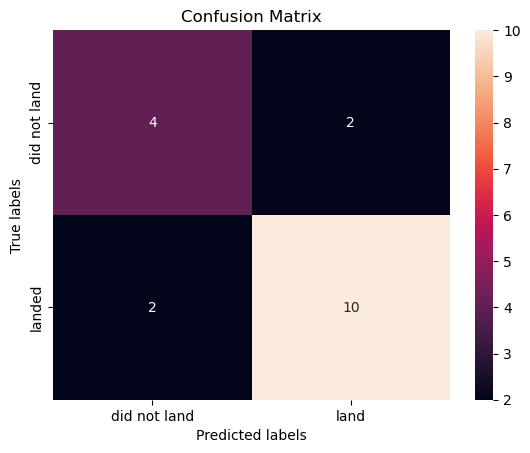

In [27]:
#yhat=logreg_cv.predict(X_test)
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(y_test,y_test_hat) # defined function with labels

dd = confusion_matrix(y_test,y_test_hat)
print(dd)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [28]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

#sklearn_svm = SVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)


In [75]:

svm_cv = GridSearchCV(estimator = svm,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)

svm_cv.fit(xtrain_norm, y_train)   

Best_SVM=svm_cv.best_estimator_
print(type(Best_SVM))
print(Best_SVM)

Rsq_test_svm = Best_SVM.score(xtest_norm, y_test) # all data test
print(Rsq_test_svm)

Rsq_train_svm = Best_SVM.score(xtrain_norm, y_train) # all data train 
print(Rsq_train_svm)

print(svm_cv.best_params_)

print(svm_cv.best_score_) # with Cv train



ValueError: Invalid parameter 'algorithm' for estimator SVC(). Valid parameters are: ['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'].

In [206]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("Train accuracy with CV=10:",svm_cv.best_score_)

y_test_hat = Best_SVM.predict(xtest_norm)
#print(y_test_hat.head())
print("Test", accuracy_score(y_test,y_test_hat))

tuned hpyerparameters :(best parameters)  {'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'linear'}
Train accuracy with CV=10: 0.8625
Test 0.8333333333333334


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [30]:
Rsq_test = Best_SVM.score(xtest_norm, y_test) # all data test
print("Accuracy score",Rsq_test)

Accuracy score 0.8333333333333334


We can plot the confusion matrix 


[[ 4  2]
 [ 2 10]]


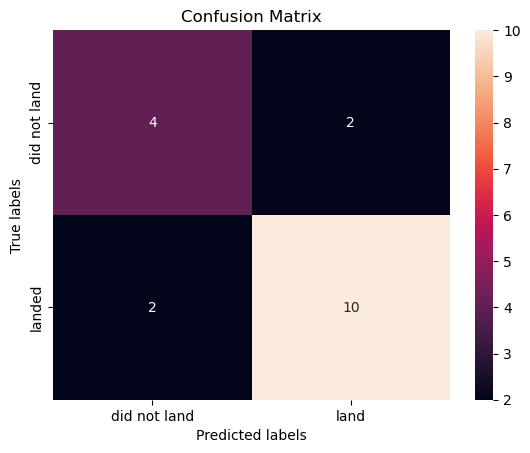

In [31]:
yhat=svm_cv.predict(xtest_norm)
plot_confusion_matrix(y_test,y_test_hat)

dd = confusion_matrix(y_test,y_test_hat)
print(dd)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [32]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [33]:
!pip install shutup
##At the top of the code
import shutup;
shutup.please()

In [34]:
tree_cv = GridSearchCV(estimator = tree,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)

tree_cv.fit(xtrain_norm, y_train)   

Best_tree=tree_cv.best_estimator_
print(type(Best_tree))
print(Best_tree)

Rsq_test_tree = Best_tree.score(xtest_norm, y_test) # all data test
print(Rsq_test_tree)

Rsq_train_tree = Best_tree.score(xtrain_norm, y_train) # all data train 
print(Rsq_train_tree)

print(tree_cv.best_params_)

print(tree_cv.best_score_) # with Cv train


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
DecisionTreeClassifier(max_depth=10, max_features='auto', splitter='random')
0.7777777777777778
1.0
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
0.9053571428571429


In [35]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.9053571428571429


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [36]:
Rsq_test_tree = Best_tree.score(xtest_norm, y_test) # all data test
print(Rsq_test_tree)

0.7777777777777778


We can plot the confusion matrix 


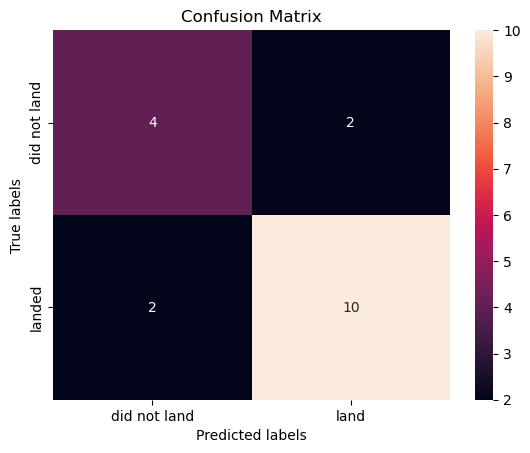

In [37]:
yhat = tree_cv.predict(xtest_norm)
plot_confusion_matrix(y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [38]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [39]:
knn_cv = GridSearchCV(estimator = KNN,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)

knn_cv.fit(xtrain_norm, y_train)   

Best_knn=knn_cv.best_estimator_
print(type(Best_knn))
print(Best_knn)

Rsq_test_knn = Best_knn.score(xtest_norm, y_test) # all data test
print(Rsq_test_knn)

Rsq_train_knn = Best_knn.score(xtrain_norm, y_train) # all data train 
print(Rsq_train_knn)

print(knn_cv.best_params_)

print(knn_cv.best_score_) # with Cv train

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
KNeighborsClassifier(n_neighbors=7, p=1)
0.8333333333333334
0.9166666666666666
{'algorithm': 'auto', 'n_neighbors': 7, 'p': 1}
0.9035714285714285


In [40]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1}
accuracy : 0.9035714285714285


## TASK  11


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [41]:
Rsq_test_knn = Best_knn.score(xtest_norm, y_test) # all data test
print(Rsq_test_knn)

0.8333333333333334


We can plot the confusion matrix 


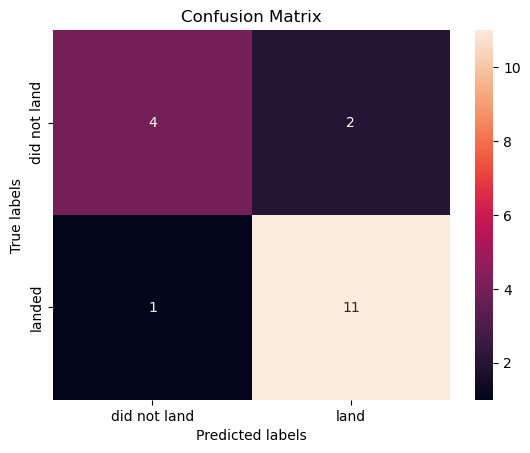

In [42]:
yhat = knn_cv.predict(xtest_norm)
plot_confusion_matrix(y_test,yhat)

## TASK  12


Find the method performs best:


In [43]:
print("Log Test vs Train Rsq with Cv ", Rsq_test_log," vs ", logreg_cv.best_score_)
print("SVM Test vs Train Rsq with Cv ", Rsq_test_svm," vs ", svm_cv.best_score_)
print("Tree Test vs Train Rsq with Cv ", Rsq_test_tree," vs ", tree_cv.best_score_)
print("KNN Test vs Train Rsq with Cv ", Rsq_test_knn," vs ", knn_cv.best_score_)

Log Test vs Train Rsq with Cv  0.7777777777777778  vs  0.8495238095238096
SVM Test vs Train Rsq with Cv  0.8333333333333334  vs  0.8625
Tree Test vs Train Rsq with Cv  0.7777777777777778  vs  0.9053571428571429
KNN Test vs Train Rsq with Cv  0.8333333333333334  vs  0.9035714285714285


In [44]:
print("SVM and KNN has similar accuracy score on test and higher than Log and TRee method")

print("SVM generalizes better than other methods where accuracy score difference between Test and Train is lesser than other methods")

SVM and KNN has similar accuracy score on test and higher than Log and TRee method
SVM generalizes better than other methods where accuracy score difference between Test and Train is lesser than other methods


In [45]:
from sklearn import metrics

y_test_hat = Best_SVM.predict(xtest_norm)
#print(y_test_hat.head())


SVM_jaccard_Score_test = metrics.jaccard_score(y_test,y_test_hat)
SVM_Rsq_Score_test = metrics.accuracy_score(y_test,y_test_hat)
SVM_f1_Score_test = metrics.f1_score(y_test,y_test_hat)
SVM_confmatrix_test = metrics.confusion_matrix(y_test,y_test_hat)


perf_metr0 = metrics.precision_recall_fscore_support(y_test,y_test_hat,pos_label=1.0, average='binary')
perf_metr1 = metrics.precision_recall_fscore_support(y_test,y_test_hat,pos_label=0.0,average='binary')

print("Test Rsq score", SVM_jaccard_Score_test)
print("Test Jaccard Index",SVM_Rsq_Score_test )
print("Test F1_Score",SVM_f1_Score_test)
print("Test confmatrix",SVM_confmatrix_test)

print("class 0 precision,recall,f1score,support",perf_metr0)
print("class1 precision,recall,f1score,support",perf_metr1)



Test Rsq score 0.8
Test Jaccard Index 0.8333333333333334
Test F1_Score 0.888888888888889
Test confmatrix [[ 3  3]
 [ 0 12]]
class 0 precision,recall,f1score,support (0.8, 1.0, 0.888888888888889, None)
class1 precision,recall,f1score,support (1.0, 0.5, 0.6666666666666666, None)


In [73]:
model = ['Log',"SVM","Tree","KNN"]
score  = [Rsq_test_log,Rsq_test_svm,Rsq_test_tree,Rsq_test_knn]
data = {'ModelMethod': model,
        'Rsqscore': score }
#print(data)
#print(type(data))
RsqScore = pd.DataFrame(data)
print(RsqScore)  

  ModelMethod  Rsqscore
0         Log  0.777778
1         SVM  0.833333
2        Tree  0.777778
3         KNN  0.833333


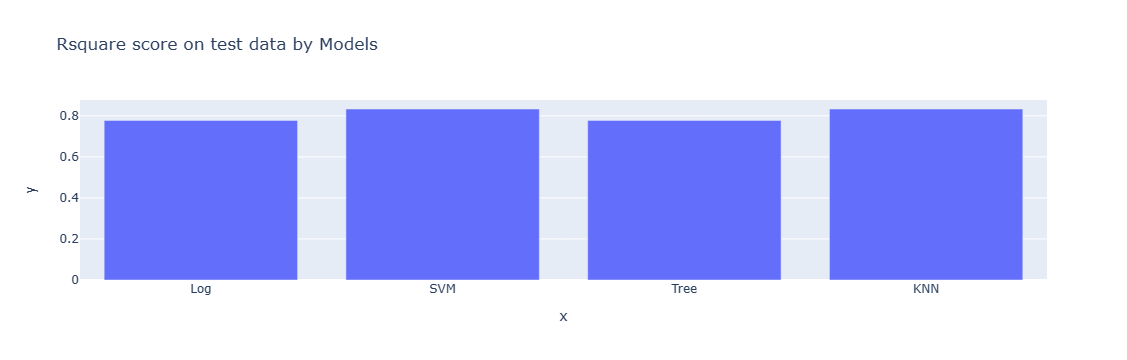

SVM and KNN has similar accuracy score on test and higher than Log and TRee method


In [74]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.bar(x=RsqScore['ModelMethod'], y=RsqScore['Rsqscore'], title='Rsquare score on test data by Models') 
fig.show()

print("SVM and KNN has similar accuracy score on test and higher than Log and TRee method")

## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-08-31       | 1.1     | Lakshmi Holla   | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |


Copyright © 2020 IBM Corporation. All rights reserved.
